In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from math import log, ceil
from sklearn.model_selection import train_test_split

In [97]:
data = pd.read_csv(
    './data/iris.data',
    names=[
        "sepal_length",
        "sepal_width",
        "petal_length",
        "petal_width",
        "species"
    ]
)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [98]:
print("stats")
data.describe().transpose()

stats


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [99]:
print("Total records: ", data.shape[0])
print("Records of each species: ", data.species.value_counts(), sep='\n')

Total records:  150
Records of each species: 
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [100]:
# One-hot encoding for species
data['species'] = data['species'].astype('category').cat.codes

In [101]:
#Feature & Target Selection
features = data.select_dtypes('float').columns
target = ['species']

# Feature& Target  Dataset
X = data[features]
y = data[target]

# Split into 90% train and 10% test
test_size = 0.1

# splitting into training and test data set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=test_size,
    random_state=0
)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [102]:
print(
    f"Training features shape: {X_train.shape}",
    f"Training targets shape: {y_train.shape}",
    f"Testing features shape: {X_test.shape}",
    f"Testing targets shape: {y_test.shape}",
    sep='\n'
)

Training features shape: (135, 4)
Training targets shape: (135, 1)
Testing features shape: (15, 4)
Testing targets shape: (15, 1)


In [103]:
print("First five elements in X_train are: \n", X_train.iloc[:5])
print("First five elements in Y_train are: \n", y_train.iloc[:5])

First five elements in X_train are: 
     sepal_length  sepal_width  petal_length  petal_width
37           4.9          3.1           1.5          0.1
78           6.0          2.9           4.5          1.5
90           5.5          2.6           4.4          1.2
45           4.8          3.0           1.4          0.3
16           5.4          3.9           1.3          0.4
First five elements in Y_train are: 
     species
37        0
78        1
90        1
45        0
16        0


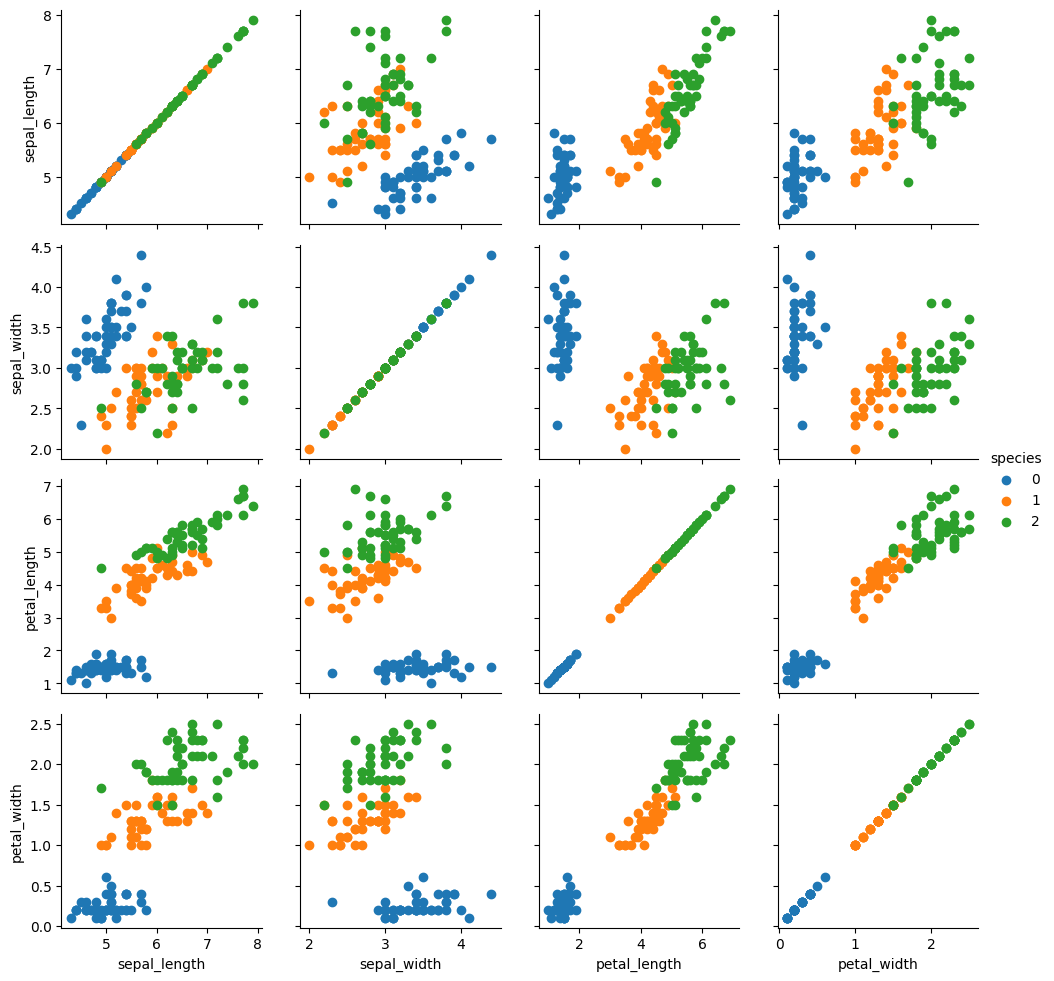

In [104]:
# Data Exploration & Visualisation

# Plotting a pair-grid to compare features and check if this data is suited for
# classification, or some more feature engineering is needed
sns.PairGrid(X_train.assign(species=y_train), hue='species').map(plt.scatter).add_legend()

# sns.FacetGrid(data, hue='species', height = 5).map(plt.scatter, 'sepal_length','sepal_width').add_legend()
# sns.FacetGrid(data, hue='species', height = 5).map(plt.scatter, 'sepal_length', 'petal_width').add_legend()
# sns.FacetGrid(data, hue='species', height = 5).map(plt.scatter, 'petal_length','sepal_width').add_legend()
# sns.FacetGrid(data, hue='species', height = 5).map(plt.scatter, 'petal_length','petal_width').add_legend()

In [105]:
# Inference from above data -
# This data has 3 unique categories, thus we would have to make 3 Logistic Regression models
# where we take 1 class and group the other 2
# ('Iris-setosa' & 'Iris-versicolor', 'Iris-virginica')
# ('Iris-setosa' & 'Iris-virginica', 'Iris-versicolor')
# ('Iris-versicolor' & 'Iris-virginica', 'Iris-setosa')

# This way, we can classify three classes using only binary classification
# Note - Multinomial classification is also possible, but it performs better
# when done via Nueral Networks with the SoftMax Activation Function

# Moreover from only plotting 2 features on a 2D graph, clear clusters are visible in the ScatterPlot,
# due to which this problem could also be solved with clustering methods and algorithms like RandomForest or KNN

# There's a clear distinction from the "petal_width" parameter (and also the petal_length param),
# the petal widths of iris-setosa, iris-versicolor and iris-virginica are in asceding order

# => intuition - the weight for 'petal_width' param would be higher than that of the other params

In [106]:
# Logistic Regression Model
# f_wb (x) = g(w.x + b), where g is the sigmoid function (1 / (1 + e^-z))

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [107]:
# Cost Function
# The cost function for logistic regression is:
# J(w, b) = (1 / m) * summation(loss(f_wb(x_i), y_i))
# where m = no of inputs, f_wb is the model, x_i is the ith
# set of input features, and y_i is the actual target value
# f_wb(x_i) gives the predicted value of target for given
# input features
# f_wb(x_i) = g(w.x_i + b), where g is the sigmoid function
# The loss function for binary classification is:
# -y_i * log(f_wb(x_i)) - (1 - y_i) * log(1 - f_wb(x_i))
def compute_cost(X, y, w, b, *argv):
    m, n = X.shape
    total_cost = 0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w, X.iloc[i]) + b)
        total_cost += (- y.iloc[i] * log(f_wb_i) - (1 - y.iloc[i]) * log(1 - f_wb_i))[0]
        
    return total_cost / m

In [108]:
def altered_cost(X, y, w, b, *argv):
    m = y.shape[0]

    y = y.values.flatten()
    f_wb = sigmoid(np.dot(X, w) + b)
    total_cost = -np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
        
    return total_cost / m

In [109]:
def isolate_single_category(y, category):
    y_filtered = y.copy()
    
    for i in range(y_filtered.shape[0]):
        if (y_filtered.iloc[i][0] != category):
            y_filtered.iloc[i] = 0
        else:
            y_filtered.iloc[i] = 1

    return y_filtered

In [110]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

# Pre-Process Y_train into 3 categories (using one-hot-encoding)
y_train_setosa = isolate_single_category(y_train, 0)
y_train_versicolor = isolate_single_category(y_train, 1)
y_train_virginica = isolate_single_category(y_train, 2)


cost_setosa = altered_cost(X_train, y_train_setosa, initial_w, initial_b)
print('(Iris-setosa) Cost at initial w and b (zeros): {:.3f}'.format(cost_setosa))

cost_versicolor = altered_cost(X_train, y_train_versicolor, initial_w, initial_b)
print('(Iris-versicolor) Cost at initial w and b (zeros): {:.3f}'.format(cost_versicolor))

cost_virginica = altered_cost(X_train, y_train_virginica, initial_w, initial_b)
print('(Iris-virginica) Cost at initial w and b (zeros): {:.3f}'.format(cost_virginica))

(Iris-setosa) Cost at initial w and b (zeros): 0.693
(Iris-versicolor) Cost at initial w and b (zeros): 0.693
(Iris-virginica) Cost at initial w and b (zeros): 0.693


In [111]:
def compute_gradient(X, y, w, b, *argv): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0

    err = []
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w, X.iloc[i]) + b)

        err_i = f_wb_i - y.iloc[i]   
        
        for j in range(n):
            dj_dw[j] += err_i * X.iloc[i, j]
            
        dj_db += err_i
   
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [112]:
def altered_gradient(X, y, w, b, *argv): 
    m, n = X.shape
    
    f_wb = sigmoid(np.dot(X, w) + b)

    err = f_wb - y.values.flatten()
 
    dj_dw = np.dot(X.T, err) / m
    dj_db = np.sum(err) / m

    return dj_db, dj_dw

In [113]:
initial_w = np.zeros(n)
initial_b = 0.

print("For Iris-setosa: ")
dj_db, dj_dw = altered_gradient(X_train, y_train_setosa, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}\n' )

print("For Iris-versicolor: ")
dj_db, dj_dw = altered_gradient(X_train, y_train_versicolor, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}\n' )

print("For Iris-virginica: ")
dj_db, dj_dw = altered_gradient(X_train, y_train_virginica, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}\n' )

For Iris-setosa: 
dj_db at initial w and b (zeros):0.15185185185185185
dj_dw at initial w and b (zeros):[1.1674074074074072, 0.34518518518518515, 1.3429629629629631, 0.5081481481481481]

For Iris-versicolor: 
dj_db at initial w and b (zeros):0.18888888888888888
dj_dw at initial w and b (zeros):[1.0837037037037038, 0.6703703703703704, 0.5429629629629631, 0.18222222222222217]

For Iris-virginica: 
dj_db at initial w and b (zeros):0.15925925925925927
dj_dw at initial w and b (zeros):[0.6555555555555558, 0.5133333333333332, -0.031851851851851874, -0.09703703703703703]



In [114]:
# Learning parameters w, b so as to minimise the cost fuction J(w, b)
# 'converging the value of the function'
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = X.shape[0]
    
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        # calculate gradient
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
        
        # Update params w, b using gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        
        # save cost J
        if (i < 100000):
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
        
        # print cost every 10 intervals
        if (i % ceil(num_iters / 10) == 0 or i == num_iters - 1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.3f}  ")

    return w_in, b_in, J_history, w_history

In [115]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(4) - 0.5) # w has 4 features
initial_b = 0
iterations = 10000

# learning rate
alpha = 0.001

In [116]:
print("Running Gradient Descent for Iris-setosa classifier")
w_s, b_s, J_history_s, _s = gradient_descent(X_train, y_train_setosa, initial_w, initial_b, altered_cost, altered_gradient, alpha, iterations, 0)

print("w, b optimised from gradient_descent: ", w_s, b_s)

Running Gradient Descent for Iris-setosa classifier
Iteration    0: Cost    0.682  
Iteration 1000: Cost    0.329  
Iteration 2000: Cost    0.219  
Iteration 3000: Cost    0.163  
Iteration 4000: Cost    0.130  
Iteration 5000: Cost    0.108  
Iteration 6000: Cost    0.093  
Iteration 7000: Cost    0.081  
Iteration 8000: Cost    0.072  
Iteration 9000: Cost    0.065  
Iteration 9999: Cost    0.059  
w, b optimised from gradient_descent:  [ 0.28468052  0.91609968 -1.47909258 -0.68050164] 0.17677097011515674


In [117]:
alpha = 0.004
iterations = 20000

print("Running Gradient Descent for Iris-versicolor classifier")
w_vc, b_vc, J_history_vc, _vc = gradient_descent(X_train, y_train_versicolor, initial_w, initial_b, altered_cost, altered_gradient, alpha, iterations, 0)

print("w, b optimised from gradient_descent: ", w_vc, b_vc)

Running Gradient Descent for Iris-versicolor classifier
Iteration    0: Cost    0.683  
Iteration 2000: Cost    0.562  
Iteration 4000: Cost    0.552  
Iteration 6000: Cost    0.543  
Iteration 8000: Cost    0.536  
Iteration 10000: Cost    0.531  
Iteration 12000: Cost    0.526  
Iteration 14000: Cost    0.522  
Iteration 16000: Cost    0.518  
Iteration 18000: Cost    0.515  
Iteration 19999: Cost    0.513  
w, b optimised from gradient_descent:  [ 0.32453031 -1.43870784  0.6194038  -1.31069612] 0.7908500352606372


In [118]:
print("Running Gradient Descent for Iris-virginica classifier")
w_vg, b_vg, J_history_vg, _vg = gradient_descent(X_train, y_train_virginica, initial_w, initial_b, altered_cost, altered_gradient, alpha, iterations, 0)

print("w, b optimised from gradient_descent: ", w_vg, b_vg)

Running Gradient Descent for Iris-virginica classifier
Iteration    0: Cost    0.691  
Iteration 2000: Cost    0.301  
Iteration 4000: Cost    0.250  
Iteration 6000: Cost    0.221  
Iteration 8000: Cost    0.201  
Iteration 10000: Cost    0.186  
Iteration 12000: Cost    0.174  
Iteration 14000: Cost    0.164  
Iteration 16000: Cost    0.156  
Iteration 18000: Cost    0.150  
Iteration 19999: Cost    0.144  
w, b optimised from gradient_descent:  [-1.818155   -1.7532863   2.74516407  2.53003581] -1.1203875430648895


In [119]:
def predict(X, w_s, b_s, w_vc, b_vc, w_vg, b_vg): 
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m, dtype=object)
   
    for i in range(m):   
        z_wb_s = np.dot(w_s, X.iloc[i]) + b_s
        z_wb_vc = np.dot(w_vc, X.iloc[i]) + b_vc
        z_wb_vg = np.dot(w_vg, X.iloc[i]) + b_vg
        
        # Calculate the prediction for setosaa
        f_wb_s = sigmoid(z_wb_s)
        
        # Calculate the prediction for versicolor
        f_wb_vc = sigmoid(z_wb_vc)
        
        # Calculate the prediction for virginica
        f_wb_vg = sigmoid(z_wb_vg)

        f_wb = [f_wb_s, f_wb_vc, f_wb_vg]
        p[i] = f_wb.index(max(f_wb))
        
    return p

In [120]:
# test against 2 cases
X_ = pd.DataFrame([[5.9, 3.0, 5.1, 1.8], [5.0, 3.6, 1.4, 0.2], [6.7,3.1,4.4, 1.4], [6.0,2.9,4.5,1.5]])
predict(X_, w_s, b_s, w_vc, b_vc, w_vg, b_vg)

# outputs seem to be accurate.

array([2, 0, 1, 1], dtype=object)

In [121]:
p = predict(X_train, w_s, b_s, w_vc, b_vc, w_vg, b_vg)
print('Train Accuracy: %f'%(np.mean(p == y_train.values.flatten()) * 100))

Train Accuracy: 97.037037


In [122]:
p = predict(X_test, w_s, b_s, w_vc, b_vc, w_vg, b_vg)
print('Test Accuracy: %f'%(np.mean(p == y_test.values.flatten()) * 100))

Test Accuracy: 100.000000


In [123]:
# Using sklearn on the dataset

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

model = SVC()

ovr = OneVsRestClassifier(model)

#fit model to training data
ovr.fit(X_train, y_train)

#Predications
ovr_pred = ovr.predict(X_train)

#Adding Predictions to Test Dataset
ovr_df = X_train.copy()
ovr_df.insert(4,"Actual",y_train, True)
ovr_df.insert(5,"Predicted",ovr_pred, True)

100 * np.sum(ovr_df['Actual'] == ovr_df['Predicted']) / ovr_df.shape[0]

96.29629629629629

In [124]:
ls = [np.append(w_s,b_s), np.append(w_vc, b_vc), np.append(w_vg, b_vg)]
model = pd.DataFrame(np.vstack(ls), columns=[
        "sepal_length_weight",
        "sepal_width_weight",
        "petal_length_weight",
        "petal_width_weight",
        "bias"
], index=pd.Index(["iris-setosa", "iris-versicolor", "iris-virginica"], name="category"))

In [125]:
model.to_pickle('./data/Iris-LR-scratch.pkl')

In [126]:
p = pd.read_pickle('./data/Iris-LR-scratch.pkl')

In [127]:
p

,sepal_length_weight,sepal_width_weight,petal_length_weight,petal_width_weight,bias
category,,,,,
iris-setosa,0.284681,0.916100,-1.479093,-0.680502,0.176771
iris-versicolor,0.324530,-1.438708,0.619404,-1.310696,0.790850
iris-virginica,-1.818155,-1.753286,2.745164,2.530036,-1.120388


In [128]:
np.array([2, 2, 2, 2], dtype="float64")

array([2., 2., 2., 2.])

In [129]:
p.loc["iris-setosa"][:4].to_numpy()

array([ 0.28468052,  0.91609968, -1.47909258, -0.68050164])

In [130]:
np.dot(p.loc["iris-setosa"][:4].to_numpy(), np.array([2, 2, 2, 2], dtype="float64")) + p.loc["iris-setosa"][-1]

-1.7408570668356487